<a href="https://colab.research.google.com/github/ikalisa1/linear_regression_model/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 1: Linear Regression**
        `Optimzed Regression `

**Step1: Importing Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


**Step2: Loading and Inspecting the Dataset**
```
Read the dataset from a CSV file.
Display the first few rows and dataset structure.

```








In [19]:
# Updated path
dataset_path = "https://raw.githubusercontent.com/ikalisa1/linear_regression_model/refs/heads/main/insurance.csv"
df = pd.read_csv(dataset_path)

display(df.head())
df.info()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Step3: Data Preprocessing**
```
Turning categorical variables into numbers using one-hot encoding..
Separate features (X) and target variable (y).

```




In [21]:
df = pd.get_dummies(df, drop_first=True)
X = df.drop(columns=['charges'])  # Features
y = df['charges']  # Target


Step4:  Train-Test Split
Split the data into training (80%) and testing (20%) sets.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Step5: Feature Scaling
Normalize the feature values for better model performance.

In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


**Step6: Data Visualization**

```
Histogram of Target Variable (Medical Charges)
Correlation Heatmap to Check Relationships Between Variables

```




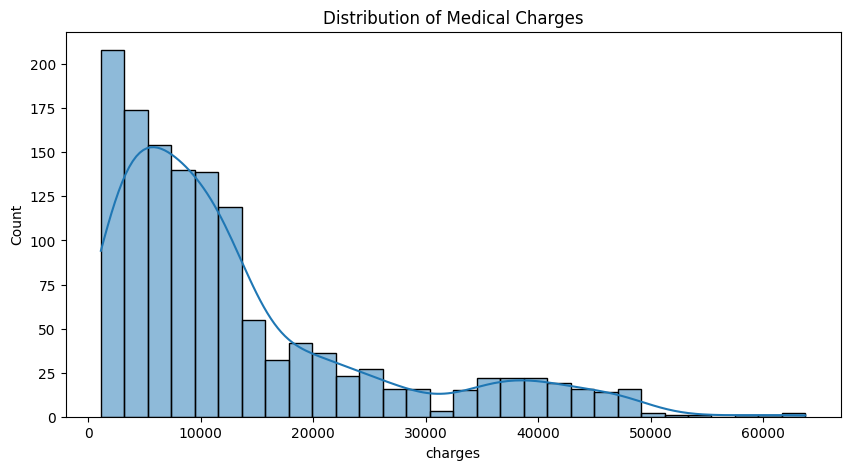

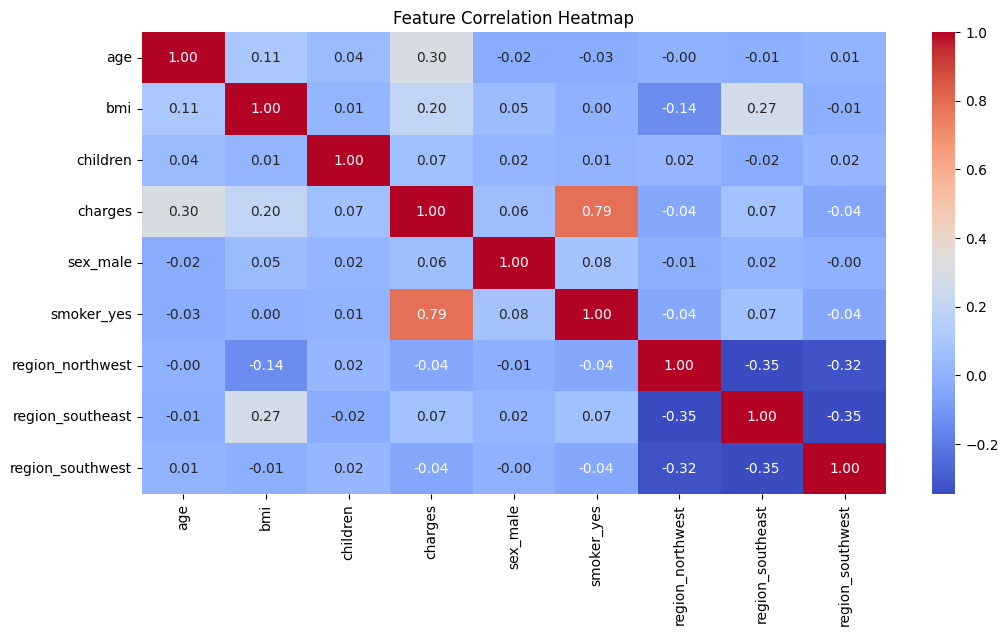

In [24]:
plt.figure(figsize=(10, 5))
sns.histplot(y, bins=30, kde=True)
plt.title("Distribution of Medical Charges")
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


**Train and Optimize Three Models**

```
(a) Linear Regression (Using Gradient Descent)
Perform hyperparameter tuning using GridSearchCV on SGDRegressor.

```




In [25]:
param_grid_lr = {'alpha': [0.0001, 0.001, 0.01, 0.1], 'max_iter': [500, 1000, 5000]}
lr_grid_search = GridSearchCV(SGDRegressor(), param_grid_lr, cv=5, scoring='neg_mean_squared_error', verbose=1)
lr_grid_search.fit(X_train, y_train)
best_lr = lr_grid_search.best_estimator_
print(f"Best Linear Regression params: {lr_grid_search.best_params_}")


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Linear Regression params: {'alpha': 0.0001, 'max_iter': 500}


**(b) Decision Tree Regression**
`Perform hyperparameter tuning on DecisionTreeRegressor.`

In [26]:
param_grid_dt = {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
dt_grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid_dt, cv=5, scoring='neg_mean_squared_error', verbose=1)
dt_grid_search.fit(X_train, y_train)
best_dt = dt_grid_search.best_estimator_
print(f"Best Decision Tree params: {dt_grid_search.best_params_}")


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Decision Tree params: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10}


**(c) Random Forest Regression**
`Perform hyperparameter tuning on RandomForestRegressor.`

In [28]:
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
rf_grid_search = GridSearchCV(RandomForestRegressor(), param_grid_rf, cv=5, scoring='neg_mean_squared_error', verbose=1)
rf_grid_search.fit(X_train, y_train)
best_rf = rf_grid_search.best_estimator_
print(f"Best Random Forest parameters: {rf_grid_search.best_params_}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Random Forest parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 50}


**Step8: Model Evaluation**
```
(Finding the Best Model)
Compute Mean Squared Error (MSE) for all three models.
Select the model with the lowest MSE.

```





In [30]:
mse_lr = mean_squared_error(y_test, best_lr.predict(X_test))
mse_dt = mean_squared_error(y_test, best_dt.predict(X_test))
mse_rf = mean_squared_error(y_test, best_rf.predict(X_test))

best_model = min([(mse_lr, best_lr, "Linear Regression"), (mse_dt, best_dt, "Decision Tree"), (mse_rf, best_rf, "Random Forest")], key=lambda x: x[0])
print(f"Best model: {best_model[2]} with MSE: {best_model[0]}")


Best model: Random Forest with MSE: 18657996.351736695


**Step9: Save the Best Model**
`Store the model using joblib so it can be used for predictions later.`

In [31]:
joblib.dump(best_model[1], "best_health_model.pkl")


['best_health_model.pkl']